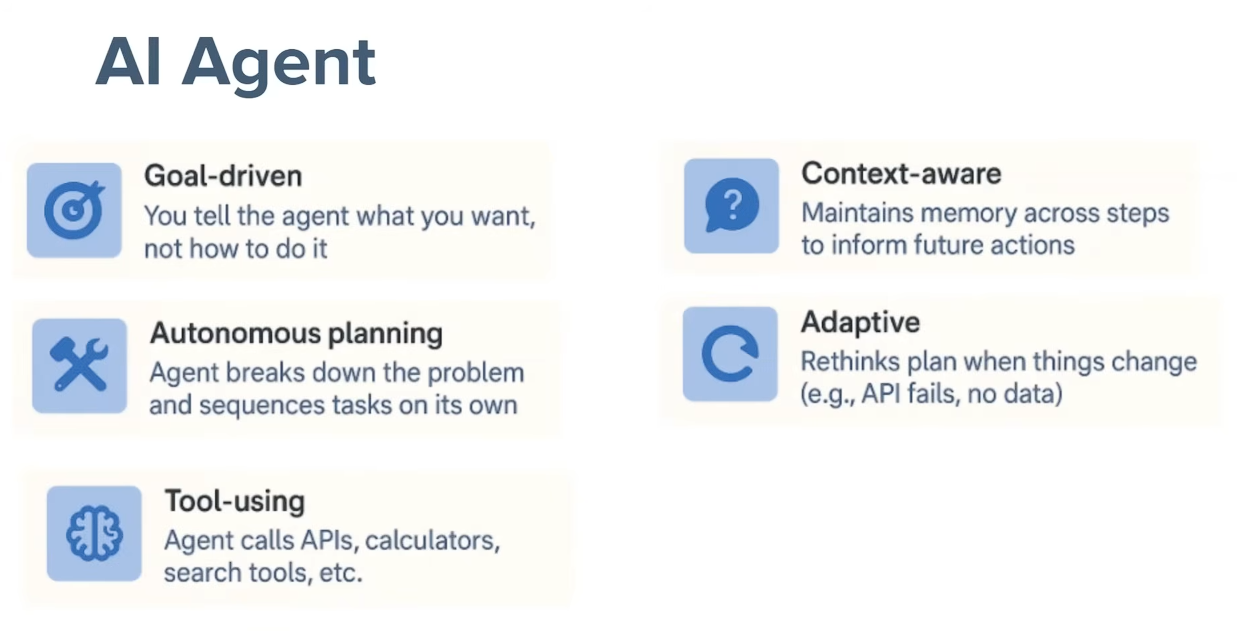
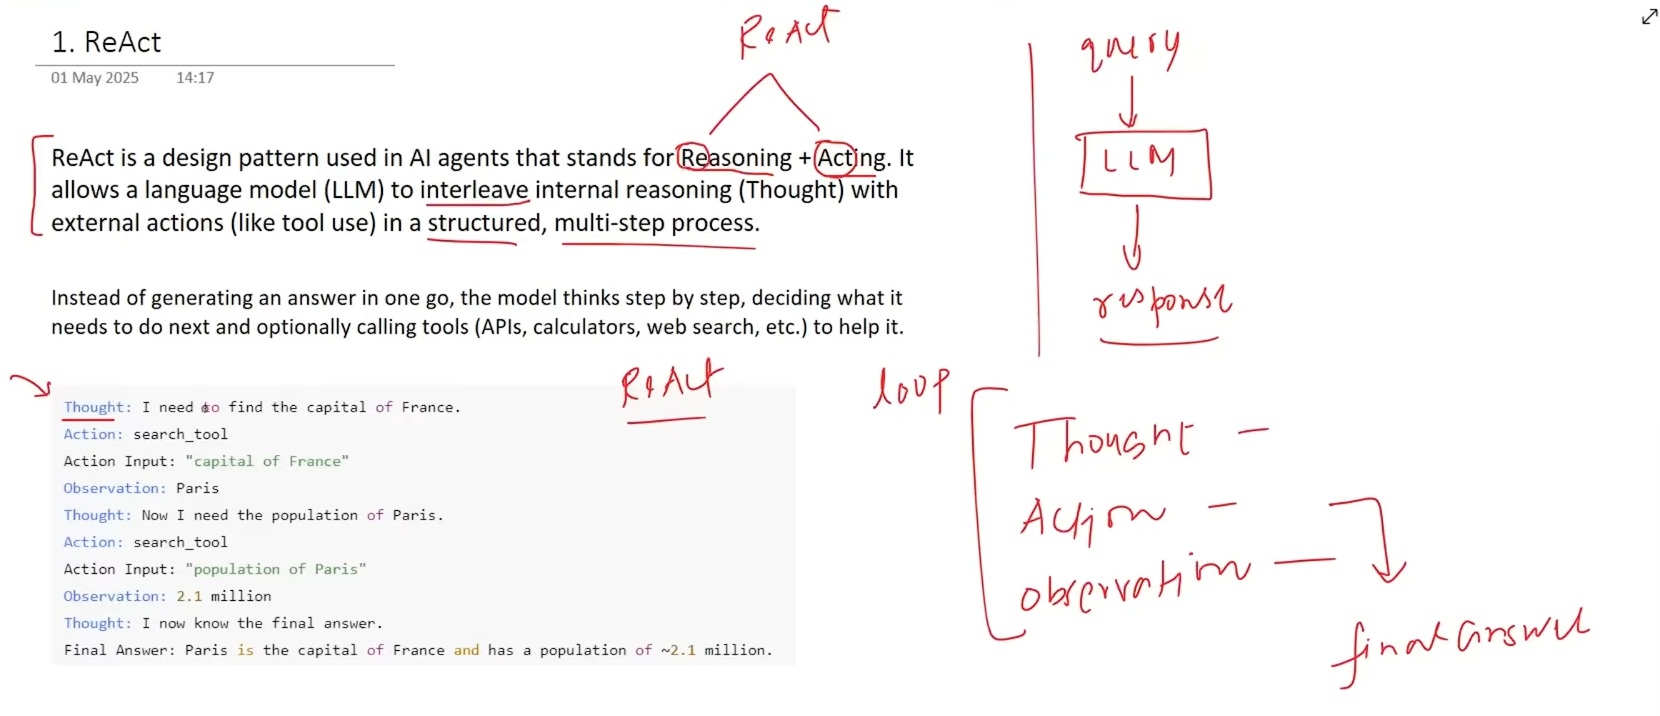
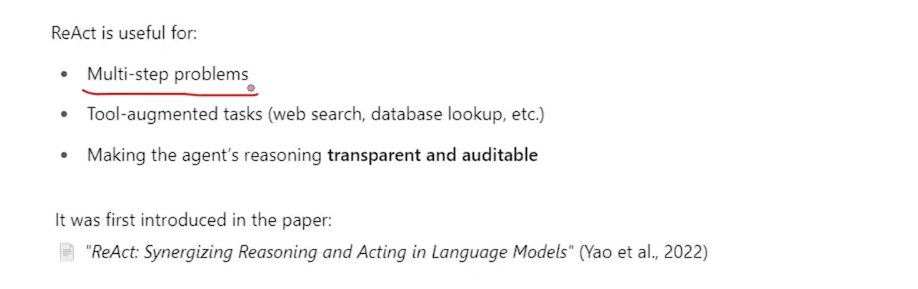
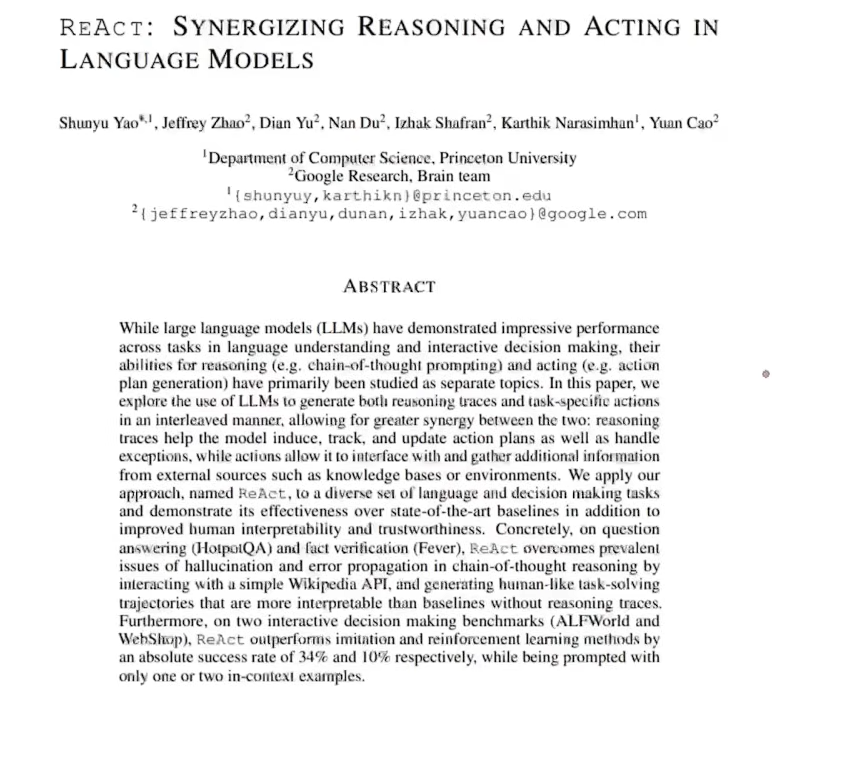


In [1]:
import os
import requests
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun

c:\Users\Sikandar\miniconda3\envs\myvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
search_tool = DuckDuckGoSearchRun()
results = search_tool.invoke("what happened between Pakistan and Afghanistan yesterday?")
print(results)

Impersonate 'chrome_116' does not exist, using 'random'


17 hours ago · Pakistan defence minister says country in 'open war' with Afghanistan after strikes What happened overnight? The first reports began to surface on Thursday, 26 February. 7 hours ago · Pakistan bombed Taliban government targets in Afghanistan 's major cities, a sharp escalation in clashes that the Pakistani defence minister described as "open war". 4 hours ago · Pakistan - Afghanistan Tensions LIVE Updates: Pakistan bombed Afghanistan 's cities, including Kabul and Kandahar, after Afghan forces attacked Pakistani border troops. 17 hours ago · Pakistan struck Kabul and two other provinces hours after the Taliban launched cross-border attacks, in the latest escalation of violence between the two South Asian neighbors. 7 hours ago · Pakistan - Afghanistan War LIVE Updates: Shelling At Torkham Border Crossing Gunfire and shelling were reported earlier today at the Torkham border crossing, a major transit point between Afghanistan and Pakistan , according to news agency AFP.


In [3]:
#Weather tool
api_key ="8064b536d65596f1d53b1111617637ce"
@tool
def get_weather_data(location: str) -> str:
    """
    Get the current weather data for a given location using the OpenWeatherMap API.
    """
    url = f"http://api.weatherstack.com/current?access_key={api_key}&query={location}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return f"Could not retrieve weather data for {location}. Please check the location name and try again."

In [4]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
llm.invoke("What is the capital of Pakistan?")

AIMessage(content='Islamabad', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 14, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-DDw3h1r8rd9zkRaFCjyk6EaHNLdsr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--019ca02c-c430-70a0-abd9-0be71d4add6e-0', usage_metadata={'input_tokens': 14, 'output_tokens': 2, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain.agents import create_react_agent, AgentExecutor
from langchain import hub

In [6]:
prompt = hub.pull(
    "hwchase17/react"
) #pulls the standard ReAct prompt from the hub (Reasoning and Acting agent)

c:\Users\Sikandar\miniconda3\envs\myvenv\lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [7]:
# Create the react agent with the LLM, tools, and prompt
agent = create_react_agent(
    llm=llm,
    tools=[search_tool, get_weather_data],
    prompt=prompt
)

In [8]:
#Agent executor is the interface we will use to interact with the agent
agent_executor = AgentExecutor(
    agent=agent,
    tools=[search_tool, get_weather_data],
    verbose=True
)

In [9]:
response = agent_executor.invoke({
    "input": "Find capital of Pakistan, then find the current weather in that city"
})
print(response) 



> Entering new AgentExecutor chain...
First, I need to find the capital of Pakistan and then get the current weather in that city.
Action: duckduckgo_search
Action Input: "capital of Pakistan"1 month ago - Islamabad (/ɪzˈlɑːməbæd/ ⓘ; Urdu: اسلامآباد, romanised: Islāmābād, lit. 'City of Islam', [ɪsˈlɑːmɑːbɑːd] ⓘ) is the capital city of Pakistan. It is the country's tenth-most populous city with a population of over 1.1 million, and is federally administered by ... 4 hours ago - Pakistan, officially the Islamic Republic of Pakistan, is a country in South Asia. It is the fifth-most populous country, with a population of over 241.5 million, having the second-largest Muslim population as of 2023. Islamabad is the nation's capital , while Karachi is its largest city and ... January 23, 2026 - The city of Islamabad , the capital of Pakistan, is located on the Pothohar Plateau within the Islamabad Capital Territory—one of the earliest known sites of human settlement in Asia. May 27, 2025 - C